# The variables are as follows:

Independent Variables:

• Cement - kg in a m3 mixture

• Blast - Blast Furnace Slag (kg in a m3 mixture)

• Fly Ash – Fly Ash (kg in a m3 mixture)

• Water - Water (kg in a m3 mixture)

• Superplasticizer – Superplasticizer (kg in a m3 mixture)

• CA - Coarse Aggregate (kg in a m3 mixture)

• FA - Fine Aggregate (kg in a m3 mixture)

• Age - Day (1~365)

Dependent Variable: • CMS - Concrete compressive strength

In [35]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [36]:
#Load Dataset
data=pd.read_csv(r'C:\Users\sgari\OneDrive\Desktop\Data Science-Durham College\Introduction to Data Analysis-1200-02\Assignments\Concrete Analysis A2\Concrete_Data.csv')
data.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [37]:
#Load the last 5 columns of dataset
data.tail()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [38]:
#Show Key Statistics
data.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
#Shows the datatypes for each column and total number of entries in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Blast             1030 non-null   float64
 2   Fly Ash           1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CA                1030 non-null   float64
 6   FA                1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CMS               1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


<AxesSubplot:>

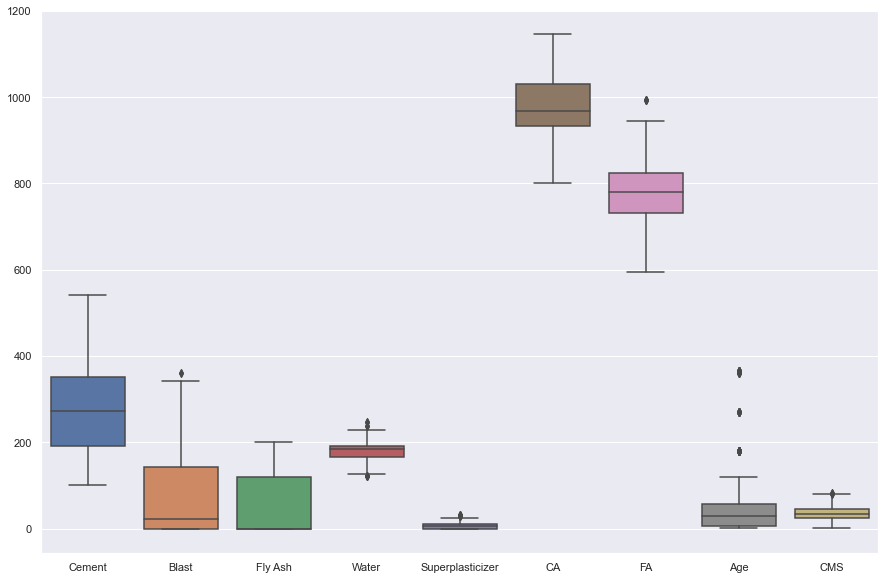

In [7]:
#Boxplot Visualization for Outlier Determination
plt.figure(figsize=(15,10))
sns.boxplot(data=data)

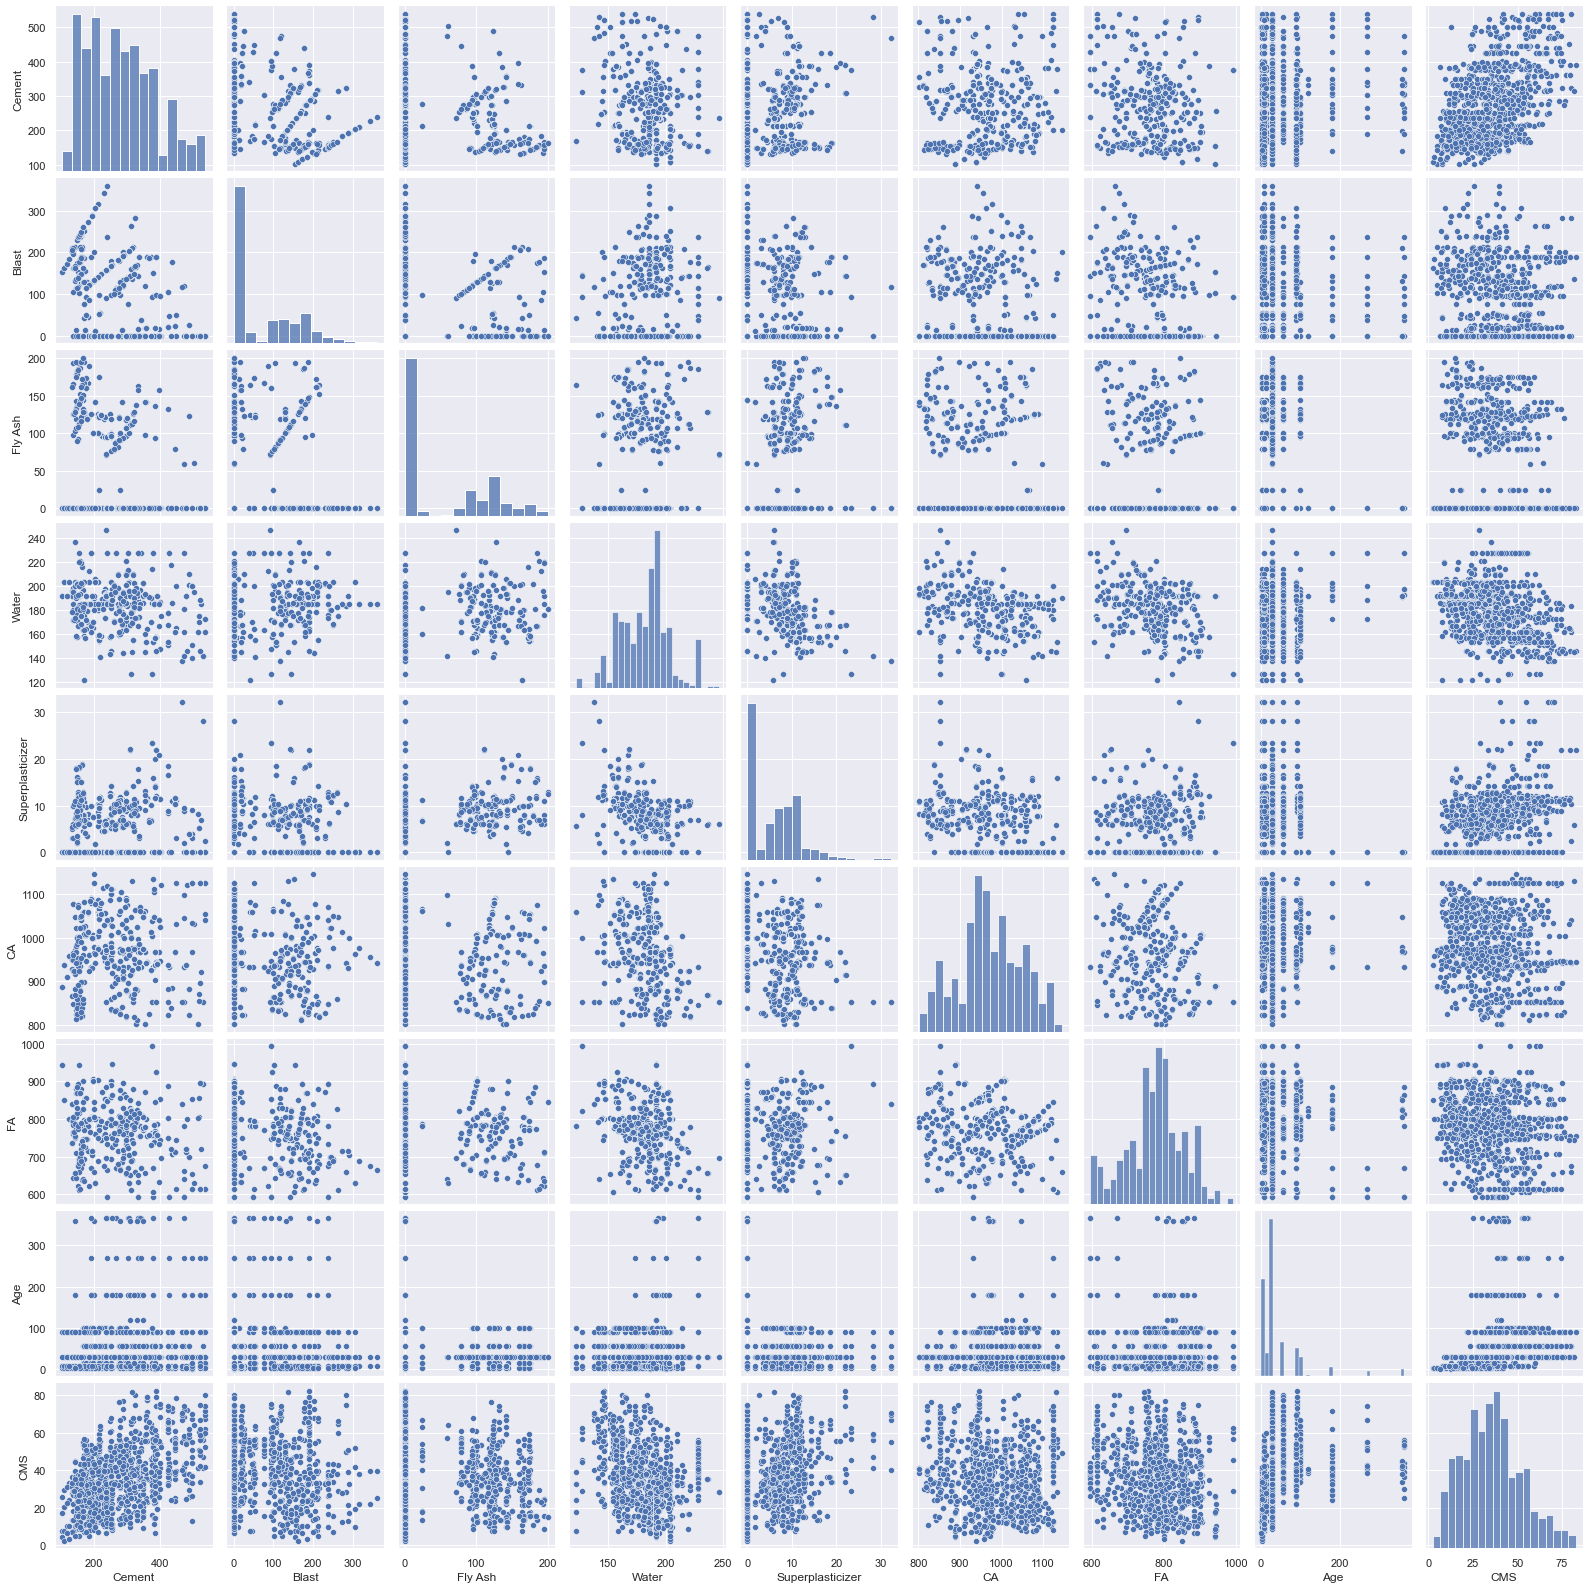

In [8]:
#sns paiplot- plots the pairwise plot of multiple features/variable in a grid format.
sns.pairplot(data)

In [9]:
#Correlation of all variables in dataset, 1 being highest correlation,0 being no correlation
data.corr()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FA,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CMS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [10]:
#Define x and y variable for dataset split of train set 80,test set 20
x = data.drop('CMS',axis=1).to_numpy()
y = data['CMS'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [11]:
#Print the Training and Testing Data for dataset split of train set 80, test set 20

print( "X-Train" ,x_train)
print("Y-train", y_train)
print("X-test", x_test)
print("Y-test", y_test)

X-Train [[ 275.1    0.   121.4 ... 1053.6  777.5   56. ]
 [ 516.     0.     0.  ...  801.   802.    28. ]
 [ 393.     0.     0.  ...  940.   758.    90. ]
 ...
 [ 213.5    0.   174.2 ... 1052.3  775.5   14. ]
 [ 531.3    0.     0.  ...  852.1  893.7    3. ]
 [ 349.     0.     0.  ... 1047.   806.   360. ]]
Y-train [56.85 41.37 48.79 24.05 23.52 26.77 37.91 55.6  77.3  36.3  53.77 72.99
 36.94 15.09 15.44 11.65 32.11 74.99 13.36 38.   37.43 33.42 50.53 43.8
 26.06 79.4  39.3  12.18 29.07 53.3  33.69 31.74 44.52 11.58 49.2  49.2
 62.5  30.96 53.39 38.07 28.68 38.6  71.3  17.54 15.52 10.38 32.9  30.44
 75.5   8.   42.14 14.8  80.2  27.68 32.96 38.56 35.17 59.59 35.96 16.5
 24.07 42.29 57.22 13.29 40.06 48.59 37.81 47.71 19.99 47.1  41.72 24.99
 21.91 45.37 14.59 42.22 26.05 15.61 13.09 44.21 26.23 55.9  33.8  48.28
 26.31 16.28 43.25 38.63 15.07 59.3  23.84 77.3  30.57  7.72 19.35 55.02
 24.9  12.64 27.42 43.01 35.57 33.8  41.68 36.64 20.97 38.33 34.56 34.29
 13.2  35.23 40.57 53.66 39.64

In [12]:
#Shape of X-Train data To determine split of the data for 80/20 split
x_train.shape

(824, 8)

In [13]:
#Shape of X-test data to determine split of data for 80/20 split
x_test.shape

(206, 8)

In [14]:
#Script for Linear Regression Model for dataset split of train set 80,test set 20
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

for name,method in [('Linear Regression', LinearRegression(n_jobs=-1))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('Method: {}'.format(name))   

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),data.drop('CMS',axis=1).columns,columns=['Coefficients'])
print('\n')
print(coeff_table)
    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, predict)))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 

Method: Linear Regression

Intercept: 35.95


                  Coefficients
Cement               13.027382
Blast                 8.952089
Fly Ash               5.955866
Water                -2.849777
Superplasticizer      1.737942
CA                    1.592146
FA                    2.035610
Age                   7.219311

R2: 0.62
Mean Absolute Error: 8.26
Mean Squared Error: 113.18
Root Mean Squared Error: 10.64


In [15]:
#Forecast Table of dataset split of train set 80,test set 20
predict2 = predict.T
diff = predict2-y_test
FcstTble=pd.DataFrame({'Actual':y_test,'Predicted':predict2.round(1),'Difference':diff.round(1)})
print('\nForecast Table')
FcstTble.head()


Forecast Table


,Actual,Predicted,Difference
0,68.10,61.1,-7.0
1,71.30,53.6,-17.7
2,25.18,22.3,-2.9
3,19.52,27.9,8.3
4,38.02,51.6,13.6


In [17]:
#Re-run the Linear Regression Model for dataset split of train set 70,test set 30

#Define x and y variable
x = data.drop('CMS',axis=1).to_numpy()
y = data['CMS'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [18]:
#Script for Linear Regression Model for dataset split of train set 70,test set 30
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

for name,method in [('Linear Regression', LinearRegression(n_jobs=-1))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('Method: {}'.format(name))   

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),data.drop('CMS',axis=1).columns,columns=['Coefficients'])
print('\n')
print(coeff_table)
    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, predict)))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict))))

Method: Linear Regression

Intercept: 35.85


                  Coefficients
Cement               12.822743
Blast                 8.402769
Fly Ash               5.778342
Water                -2.445926
Superplasticizer      2.123196
CA                    1.651849
FA                    1.844154
Age                   7.039524

R2: 0.63
Mean Absolute Error: 8.34
Mean Squared Error: 111.58
Root Mean Squared Error: 10.56


In [19]:
#Forecast Table for dataset split of train set 70,test set 30
predict2 = predict.T
diff = predict2-y_test
FcstTble=pd.DataFrame({'Actual':y_test,'Predicted':predict2.round(1),'Difference':diff.round(1)})
print('\nForecast Table')
FcstTble.head()


Forecast Table


,Actual,Predicted,Difference
0,68.10,59.5,-8.6
1,71.30,52.8,-18.5
2,25.18,22.7,-2.4
3,19.52,28.2,8.7
4,38.02,51.7,13.7


In [21]:
#Creating new dataframe data2 by removing variables "Age"-highest number of outliers, and "Fly Ash"-lowest correlation with CMS
data2= data.drop(['Age','Fly Ash'],axis=1)

In [22]:
#first five rows of data 2 dataframe
data2.head()

,Cement,Blast,Water,Superplasticizer,CA,FA,CMS
0,540.0,0.0,162.0,2.5,1040.0,676.0,79.99
1,540.0,0.0,162.0,2.5,1055.0,676.0,61.89
2,332.5,142.5,228.0,0.0,932.0,594.0,40.27
3,332.5,142.5,228.0,0.0,932.0,594.0,41.05
4,198.6,132.4,192.0,0.0,978.4,825.5,44.30


In [23]:
#Dropping the independent variables with the lowest correlaion with CMS, "Ash" as noted from heat map and the most outliers "Age" as noted from boxplot
#Re-run the Linear Regression Model for dataset split of train set 70,test set 30

#Define x and y variable

x = data2.drop('CMS',axis=1).to_numpy()
y = data2['CMS'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [24]:
#Script for Linear Regression Model for dataset split of train set 70,test set 30 when dropping independent variables "Fly Ash", and "Age"
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

for name,method in [('Linear Regression', LinearRegression(n_jobs=-1))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('Method: {}'.format(name))   

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),data2.drop('CMS',axis=1).columns,columns=['Coefficients'])
print('\n')
print(coeff_table)
    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, predict)))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict))))

Method: Linear Regression

Intercept: 35.85


                  Coefficients
Cement                7.713748
Blast                 2.858880
Water                -3.979001
Superplasticizer      2.825552
CA                   -1.323687
FA                   -2.800282

R2: 0.47
Mean Absolute Error: 10.36
Mean Squared Error: 161.62
Root Mean Squared Error: 12.71


In [25]:
#Forecast Table for dataset split of train set 70,test set 30 when dropping independent variables "Fly Ash", and "Age"
predict2 = predict.T
diff = predict2-y_test
FcstTble=pd.DataFrame({'Actual':y_test,'Predicted':predict2.round(1),'Difference':diff.round(1)})
print('\nForecast Table')
FcstTble.head()


Forecast Table


,Actual,Predicted,Difference
0,68.10,50.1,-18.0
1,71.30,52.3,-19.0
2,25.18,28.5,3.3
3,19.52,30.5,11.0
4,38.02,54.6,16.6


In [26]:
#new dataframe data 5 for outlier analysis of Age variable 
data5=data

In [27]:
#Since Age variable has the largest amount of Outliers, replaced outliers with null value to later replace with mean.
for x in ['Age']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data5.loc[data[x] < min,x] = np.nan
    data5.loc[data[x] > max,x] = np.nan

In [28]:
#Count of Null values in Age variable
data5.isnull().sum()

Cement               0
Blast                0
Fly Ash              0
Water                0
Superplasticizer     0
CA                   0
FA                   0
Age                 59
CMS                  0
dtype: int64

In [29]:
#Filled Null values in Age variable with mean value 
missing_col = ['Age']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 data5.loc[data5.loc[:,i].isnull(),i]=data5.loc[:,i].mean()

In [30]:
#Rechecking for any null values in Age variable 
data5.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

In [31]:
#Checking if the Key Statistics have changed once replacement of mean  value for outliers in Age 
data5.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,32.514933,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,27.783883,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,32.514933,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,120.000000,82.600000


In [32]:
#Define x and y variable for dataset with replaced outliers in Age variable  with mean.split of train set 70,test set 30
x = data5.drop('CMS',axis=1).to_numpy()
y = data5['CMS'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [33]:
#Script for Linear Regression Model for dataset with replaced outliers in Age variable  with mean.split of train set 70,test set 30
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

for name,method in [('Linear Regression', LinearRegression(n_jobs=-1))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('Method: {}'.format(name))   

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),data.drop('CMS',axis=1).columns,columns=['Coefficients'])
print('\n')
print(coeff_table)
    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, predict)))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict))))

Method: Linear Regression

Intercept: 35.85


                  Coefficients
Cement               10.855933
Blast                 5.855082
Fly Ash               2.908373
Water                -3.050245
Superplasticizer      1.269222
CA                   -0.464491
FA                   -0.945878
Age                   8.594593

R2: 0.74
Mean Absolute Error: 6.66
Mean Squared Error: 80.36
Root Mean Squared Error: 8.96


In [34]:
#Forecast Table for dataset split of train set 70,test set 30 for dataset with replaced outliers in Age variable  with mean.
predict2 = predict.T
diff = predict2-y_test
FcstTble=pd.DataFrame({'Actual':y_test,'Predicted':predict2.round(1),'Difference':diff.round(1)})
print('\nForecast Table')
FcstTble.head()


Forecast Table


,Actual,Predicted,Difference
0,68.10,69.4,1.3
1,71.30,51.9,-19.4
2,25.18,26.3,1.2
3,19.52,20.4,0.9
4,38.02,47.3,9.3


INSIGHTS

Introduction: A dataset Concrete_Data was given which has 1030 rows and 9 columns(independent variables) : Cement, Blast, Fly Ash, Water, Superplasticizer, CA,FA, and Age. The dependent variable was the CMS (Concrete Compressive Strength) at which the house was sold. In this assignment, an analysis of statistics and multivariate/multiple regression algorithm was done to develop insights that can be used to create a machine learning model. The following concepts were applied in the exploratory data analysis: key statistics, Boxplot plotting, correlation analysis, outlier determination and manipulation, Linear Regression Analysis and evaluation of the model to determine if it is a good fit to the data.

A).Key Statistics: The following Python libraries were imported to do the analysis: Pandas, Numpy, Mathplotlib. and Seaborn.

The mean price is defined as the mathematical average of the data. The mean of the dependent variable, Concrete Compressive Strength (CMS) is 35.8. The minimum CMS is 2.33. The maximum CMS 82.6. This indicates that there is a high variability of CMS within the dataset. The mean, maximum values, and minimum values insight will tell how much the variability is affecting the mean CMS, and what kinds of differences are there between the CMS based on different independent variables. (ie. how much water and cement does the highest CMS have? How old is the CMS? How much Blast? etc.)

Standard Deviation describes the spread of the observation from the mean. A high standard deviation indicates that the values are spread over a wide range. A low standard deviation indicates that the values are closer to the mean(average) value. The standard deviation for CMS is 16.70 which is far from the mean value indicating a large variation in CMS. The same statistics were carried out for all variables, and it was found that the mean for Superplasticizer was 6.20, the minimum was 0 kg/m3, and the maximum Superplasticizer was 32 kg/m3. The standard deviation for Superplasticizer is 5.97 which is not far from the mean of 6.2. This indicates that the various values of superplasticizer (kg/m3) have less variation and are closer in number to one another.

Linearity models can be done with these variables. Correlation ranges from -1 to 1.A negative correlation indicates that as one variable goes up, the other goes down. A correlation of 0 means that two variables are not related at all. A correlation of 1 is perfect correlation, and means that as the ﬁrst variable changes, the second changes in the same direction, though not necessarily by the same amount After running the correlation command on Python, CMS and Age as well as CMS and Cement have the highest correlation of 0.5.Fly Ash and CMS have a negative correlation, as well as the lowest correlation of -0.11.

B).State and Explain Regression Model Algorithm

Regression analysis is an important statistical method that allows us to examine the relationship between two or more variables in the dataset.

The general linear model requires the independent variable (x)to be a normal distribution that is continuous. The dependent variable (y) is the outcome &response variable. In simple linear regression model, a linear relationship is being predicted using a single independent or explanatory variable (x.). In this assignment, multivariate regression is being used where there are multiple independent or explanatory variables (x1,x2,x3..etc.) to estimate or predict a linear relationship.

Multivariate Regression is a supervised machine learning algorithm involving multiple data variables for analysis. Multivariate regression has one dependent variable and multiple independent variables. Based on the number of independent variables, output is predicted. Multivariate regression tries to find a formula that can explain how factors in variables respond simultaneously to changes in others.

In simple linear regression, we establish a relationship between the target variable and input variables by fitting a line, known as the regression line.In general, a line can be represented by linear equation y = B1 x1 +B2x2… + Bo .Where y is the dependent variable, x is the independent variable, B is the coefficient or slope, Bo is the intercept of line.

C).Evaluate the model(Do you think it is a good model? Why or why not?)

The model when taking a dataset split of train 80 and test 20 gave the following results:

R2: 0.62 R-square value depicts the percentage of the variation in the dependent variable explained by the independent variable in the model. An R^2 of 0.62 means that the model has differences between the actual and predicted. dependent value. R square is always between 0 and 100. 0 represents no variation in response variable (CMS) to CMS mean. 100 means all CMS values are around the mean.

Mean Absolute Error: 8.26 The Mean Absolute Error is the absolute difference between the actual and predicted CMS values which is also known as the residual. Each residual contributes proportionally to the total amount of error, and the larger the error the larger the contribution. 0 MAE is a perfect predictor of the outputs. Model MAE is 8.26 which is satisfactory.

Mean Squared Error: 113.18 The mean Square error is the mean of the squared errors. The effect of the square term in the MSE equation is most apparent with the presence of outliers in our data. Since our MSE is high, it indicates that there is a presence of outliers in the data which will have a significant effect on the overall error of the linear regression model.

Root Mean Squared Error: 10.64 The Root Mean squared error is the square root of the mean squared error. The root mean squared error is a measure of how large the residuals are spread out. RMSE is the standard deviation of the residual error. It is always positive, and a lower value indicates better performance. Ideal value is 0, but that is never achieved. Model RMSE is 10.64 which is satisfactory.

Linear Regression Model for dataset split of train set 70,test set 30

R2: 0.63

Mean Absolute Error: 8.34

Mean Squared Error: 111.58

Root Mean Squared Error: 10.56

Linear Regression Model for dataset split of train set 70,test set 30 when dropping independent variables "Fly Ash", and "Age"

R2: 0.47

Mean Absolute Error: 10.36

Mean Squared Error: 161.62

Root Mean Squared Error: 12.71

Linear Regression Model for dataset with replaced outliers in Age variable with mean.split of train set 70,test set 30

R2: 0.74

Mean Absolute Error: 6.66

Mean Squared Error: 80.36

Root Mean Squared Error: 8.96

D).Identify 3 ways to help improve the performance of the model? Justify each of your answers.

1.Change the ratio of the test-train split.

This may improve the performance of the model. Training Dataset: The sample of data used to fit the model.
Testing Dataset: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset. The higher the size the training data, the better the model can be created to be tested, but this does not guarantee a good prediction.

Add a Validation Set to your Linear Regression Model.
Validation Dataset is defined as the sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration. The validation can improve the performance of the model by helping to define the model equation by altering the hyper-parameters of the Regression model.

3.Outlier Removal or Replacement.

Outliers can affect the overall standard variation of the data and manipulate the overall mean of the data. The data begins to skew, and change from a normal distribution. Oultiers cause bias in the accuracy estimation of the machine learning model, and the evaluation parameters such as r squared, mean absolute error, mean squared error, and root mean squared error. They affect the distribution and statistics of the dataset.

In this model, the independent variable “Age” had the largest number of outliers as determined by the boxplot. When the outliers in this variable were replaced with the mean value, the model performance improved significantly. The R2 value increased to 0.74, Mean Absolute Error to 6.66, Mean Squared Error to 80.36, and Root Mean Squared Error to 8.96 (all reduced).